

# Example of fields and operators acting on them

Simple script to show a 2D vector field and apply curl and divergence operator on it.

- can you predict from looking at the vectorfield what the qualitative outcome of curl (rotor) and divergence (divergentie) operators will be?
- how would the same exercise look in 3D?
- can you intuitively explain what a gradient of a scalar field looks like?
- can you verify the numerical results with an analytical expression for the given vector and scalar field? (maybe you discover scaling factor errors in the code)

(c) Jo Verbeeck sept 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
%matplotlib inline

Create a 2D grid (3D is equally possible but harder to visualise)

In [2]:
xmax=1
xpoints=128
x=np.linspace(-xmax,xmax,xpoints)
y=np.linspace(-xmax,xmax,xpoints)
xd=x[1]-x[0]
x2d,y2d=np.meshgrid(x,y,indexing='xy')
r2d=np.sqrt(x2d**2 + y2d**2+xd**2) #xd to avoid divide by zero in center
r2d2=np.sqrt((x2d-xmax/2)**2 + (y2d-xmax/2)**2+xd**2)

In [3]:
np.shape(y)

(128,)

Example field 1

In [4]:
u = -y2d/r2d**2 + (x2d-xmax/2)/r2d2**2
v =  x2d/r2d**2 + (y2d-xmax/2)/r2d2**2

In [5]:
np.shape(x2d)

(128, 128)

And show it

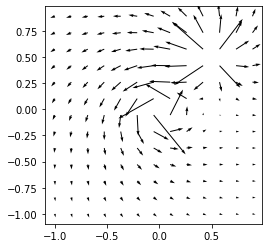

In [6]:
skippts=10
skip=(slice(None,None,skippts),slice(None,None,skippts)) #don't plot all the point as this get too messy
plt.quiver(x2d[skip],y2d[skip],u[skip],v[skip])
plt.axis('square')
plt.show()

Now test some vector operators on this field to get a feeling for their meaning

In [7]:
def divcurl(u,v,xaxis,yaxis):
    #discrete numerical approximation to divergence and curl operator
    #we express that divergence equals the flux out of a pixel
    #this may not be the most elegant or accurate way
    kerndx=np.array([[0,0,0],[1, 0, -1],[0,0,0]]) #strange sign convention?
    kerndy=np.array([[0,1,0],[0, 0, 0],[0,-1,0]])
    dx=(xaxis[2]-xaxis[0])
    dy=(yaxis[2]-yaxis[0])
    dudx=signal.convolve(u,kerndx,mode='same')/dx
    dvdy=signal.convolve(v,kerndy,mode='same')/dy
    div=dudx+dvdy
    s2=np.sqrt(2.0)
    #kerncurlx=np.array([[-s2,-1,-s2],[0, 0, 0],[s2,1,s2]])
    #kerncurly=np.array([[-s2,0,s2],[1, 0, 1],[-s2,1,s2]])
    dudy=signal.convolve(u,kerndy,mode='same')/dy
    dvdx=signal.convolve(v,kerndx,mode='same')/dx
    curlz=dvdx-dudy
    return div,curlz
divergence,curlz=divcurl(u,v,x,y)

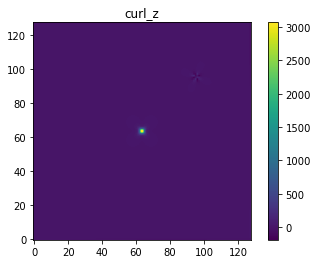

In [8]:
plt.imshow(curlz,origin='lower')
plt.title('curl_z')
plt.colorbar()
plt.show()

Note how we only get a strong positive component of the curl near the point where the vectorfield makes a counterclockwise vortex (therefore the curlz reads positive). 

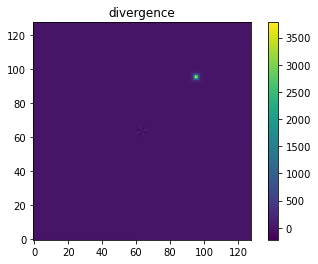

In [9]:
plt.imshow(divergence,origin='lower')
plt.title('divergence')
plt.colorbar()
plt.show()

The divergence shows a strong positive point around the position where field lines seem to emerge from a point.

Now create a scalar field to demonstrate the gradient

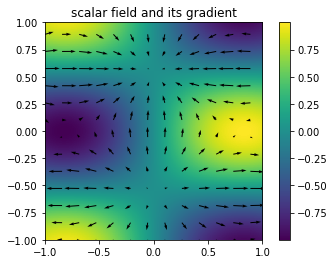

In [10]:
scalar=np.multiply(np.sin(0.6*np.pi*x2d/xmax),np.cos(0.9*np.pi*y2d/xmax))
dscalardx,dscalardy=np.gradient(scalar,x,y)
plt.imshow(scalar,origin='lower',extent=[-xmax,xmax,-xmax,xmax])
plt.colorbar()
plt.quiver(x2d[skip],y2d[skip],dscalardx[skip],dscalardy[skip])
plt.title('scalar field and its gradient')
plt.show()

Note how the gradient points in the direction of the steepest descent towards lower values of the scalar field and is zero on the peaks and in the valeys.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=048af6d7-3070-4a15-9eaf-da62e930ccca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [11]:
# https://stackoverflow.com/questions/71990386/calculating-divergence-and-curl-from-optical-flow-and-plotting-it

def divergence_npgrad(u, v):
    dFx_dx = np.gradient(v, axis=0)
    dFy_dy = np.gradient(u, axis=1)
    return dFx_dx + dFy_dy

def curl_npgrad(u, v):    
    dFx_dy = np.gradient(v, axis=1)
    dFy_dx = np.gradient(u, axis=0)
    curl = dFy_dx - dFx_dy
    return curl

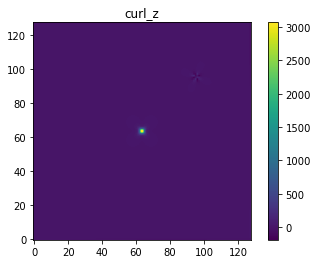

In [12]:
curl_npgrad(u,v)
plt.imshow(curlz,origin='lower')
plt.title('curl_z')
plt.colorbar()
plt.show()

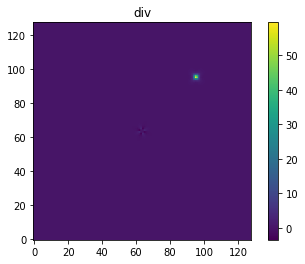

In [13]:
div = divergence_npgrad(u,v)
plt.imshow(div,origin='lower')
plt.title('div')
plt.colorbar()
plt.show()